In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("C:/Users/HP/Desktop/Master2/MLearning/Donnees\DataSets/soybean.csv")
data.head()

,Unnamed: 0,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,...,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,1,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Sélectionner les variables catégorielles
cat_cols = data.select_dtypes(include=['object', 'category']).columns

In [26]:
# Identifier les variables avec une faible variance
for col in cat_cols:
    unique_vals = data[col].nunique()
    print(f"{col}: {unique_vals} valeurs uniques")

Class: 19 valeurs uniques


<Figure size 1000x600 with 0 Axes>

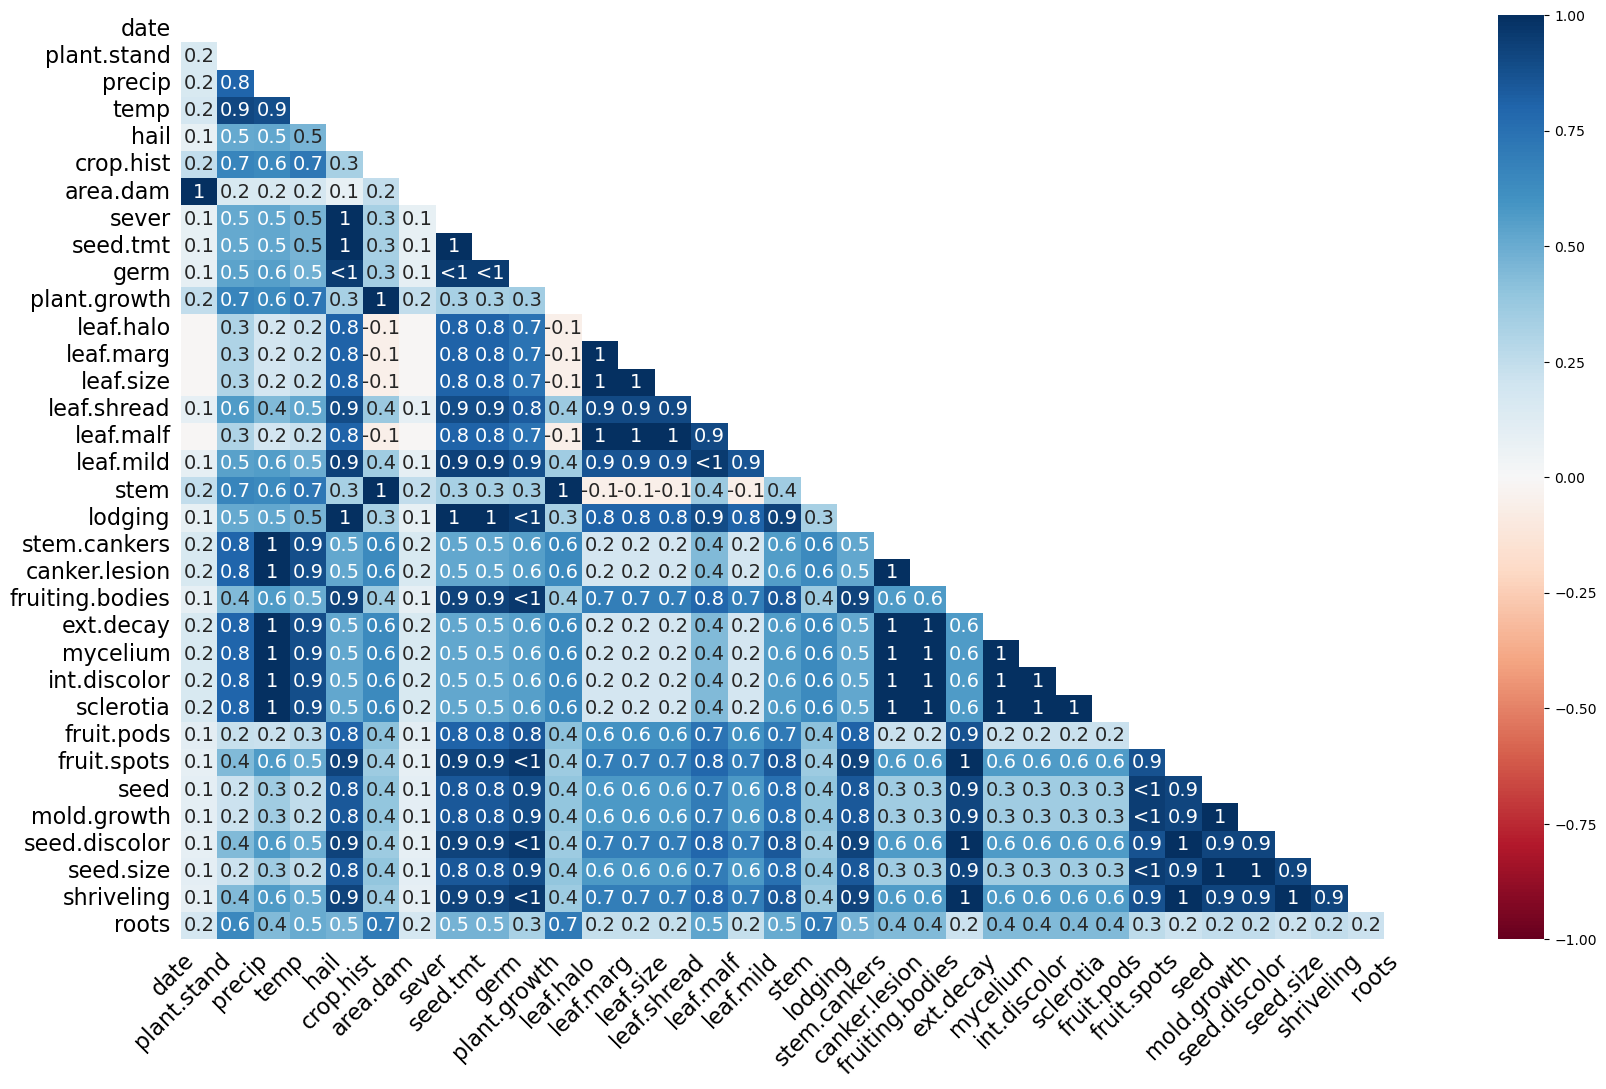

In [27]:
import missingno as msno

# Visualiser les données manquantes globalement
plt.figure(figsize=(10, 6))
msno.heatmap(data)
plt.show()

In [28]:
 #  Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percent = data.isnull().sum() / len(data) * 100
print("Pourcentage de valeurs manquantes :\n", missing_percent)

Pourcentage de valeurs manquantes :
 Unnamed: 0          0.000000
Class               0.000000
date                0.146413
plant.stand         5.270864
precip              5.563690
temp                4.392387
hail               17.715959
crop.hist           2.342606
area.dam            0.146413
sever              17.715959
seed.tmt           17.715959
germ               16.398243
plant.growth        2.342606
leaves              0.000000
leaf.halo          12.298682
leaf.marg          12.298682
leaf.size          12.298682
leaf.shread        14.641288
leaf.malf          12.298682
leaf.mild          15.812592
stem                2.342606
lodging            17.715959
stem.cankers        5.563690
canker.lesion       5.563690
fruiting.bodies    15.519766
ext.decay           5.563690
mycelium            5.563690
int.discolor        5.563690
sclerotia           5.563690
fruit.pods         12.298682
fruit.spots        15.519766
seed               13.469985
mold.growth        13.469985
seed.d

In [29]:
# Identifier les colonnes avec des données manquantes > 0
missing_cols = missing_percent[missing_percent > 0].index
missing_cols


Index(['date', 'plant.stand', 'precip', 'temp', 'hail', 'crop.hist',
       'area.dam', 'sever', 'seed.tmt', 'germ', 'plant.growth', 'leaf.halo',
       'leaf.marg', 'leaf.size', 'leaf.shread', 'leaf.malf', 'leaf.mild',
       'stem', 'lodging', 'stem.cankers', 'canker.lesion', 'fruiting.bodies',
       'ext.decay', 'mycelium', 'int.discolor', 'sclerotia', 'fruit.pods',
       'fruit.spots', 'seed', 'mold.growth', 'seed.discolor', 'seed.size',
       'shriveling', 'roots'],
      dtype='object')

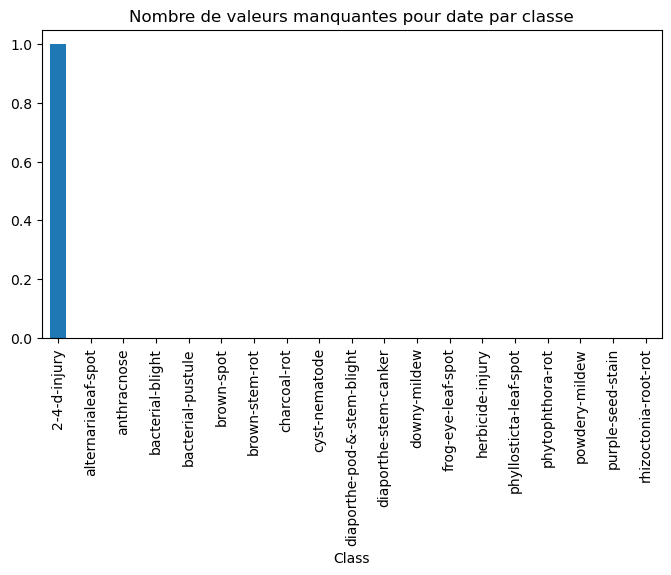

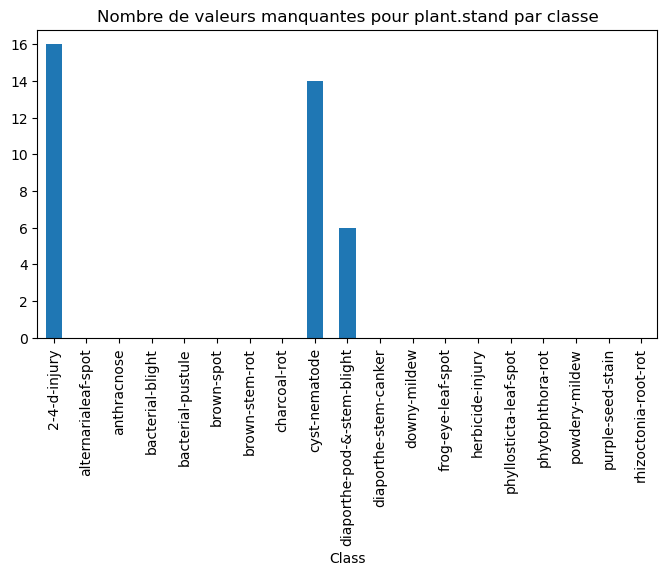

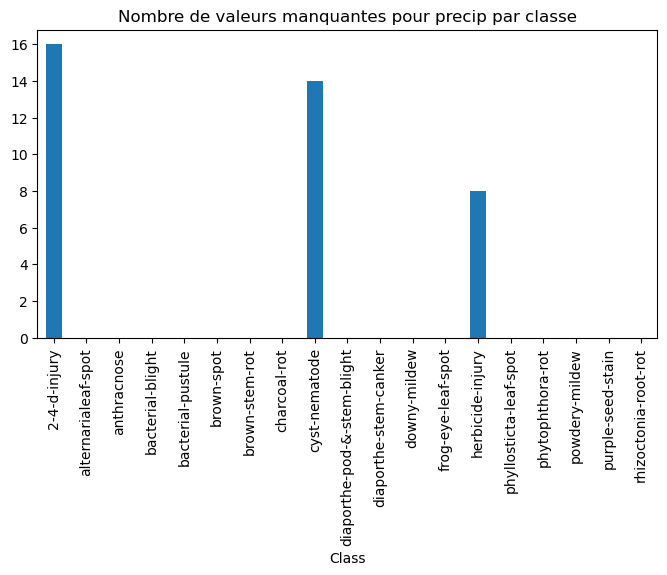

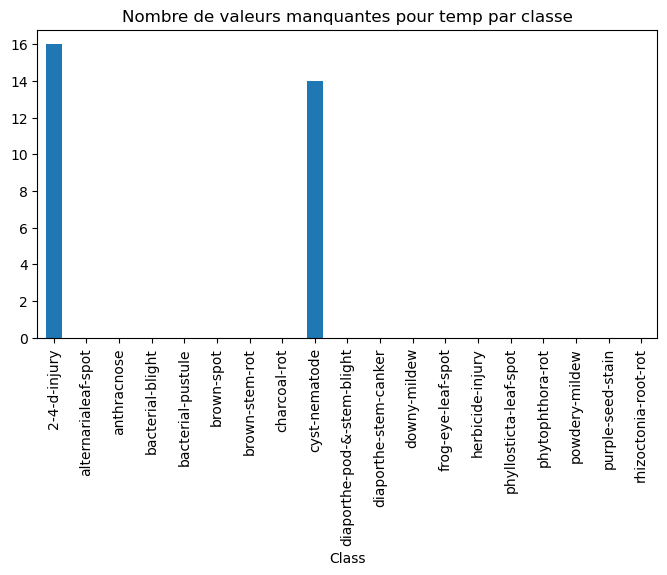

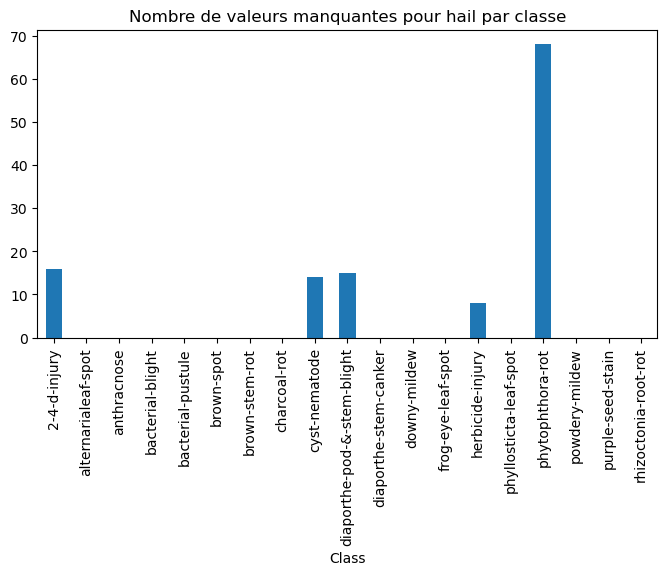

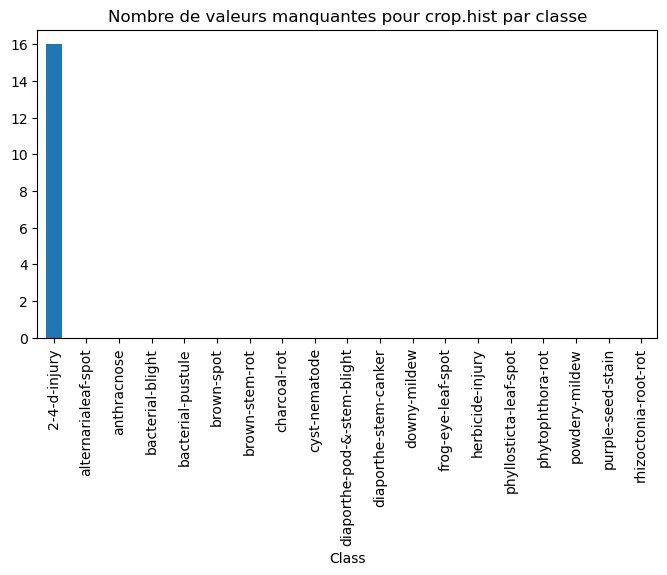

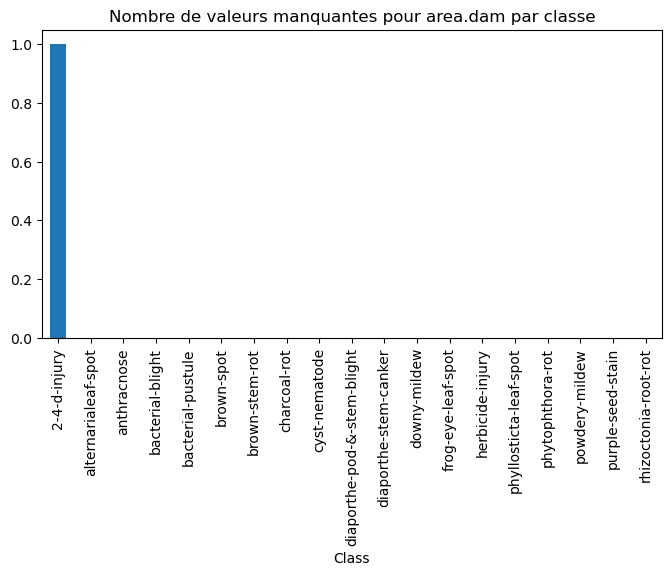

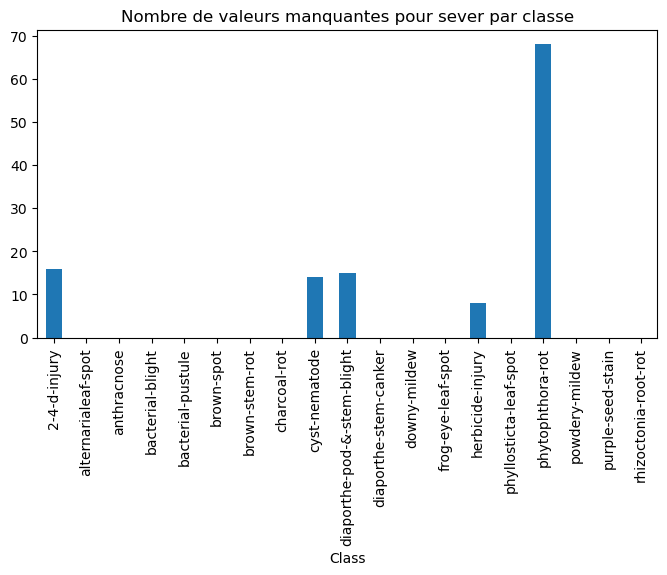

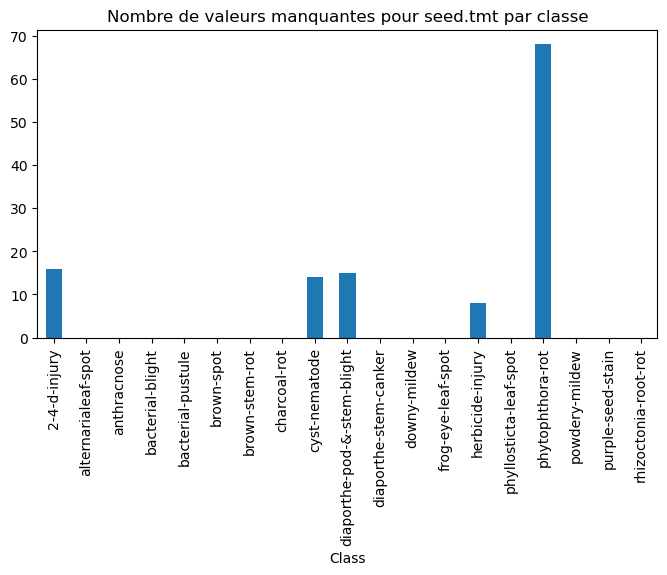

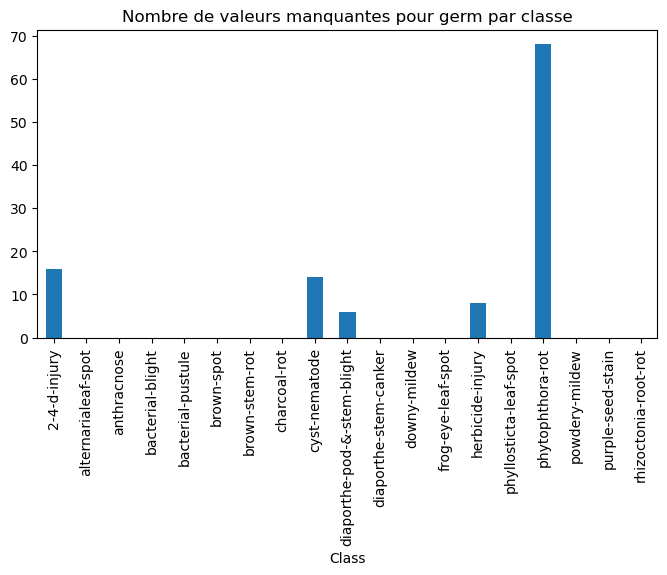

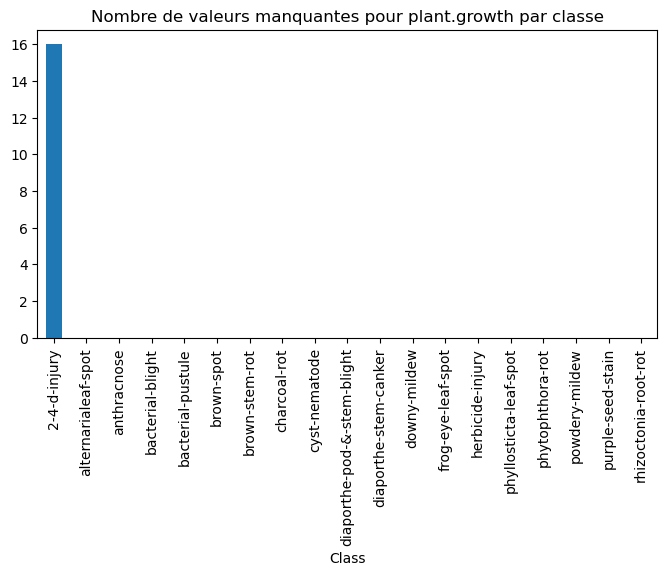

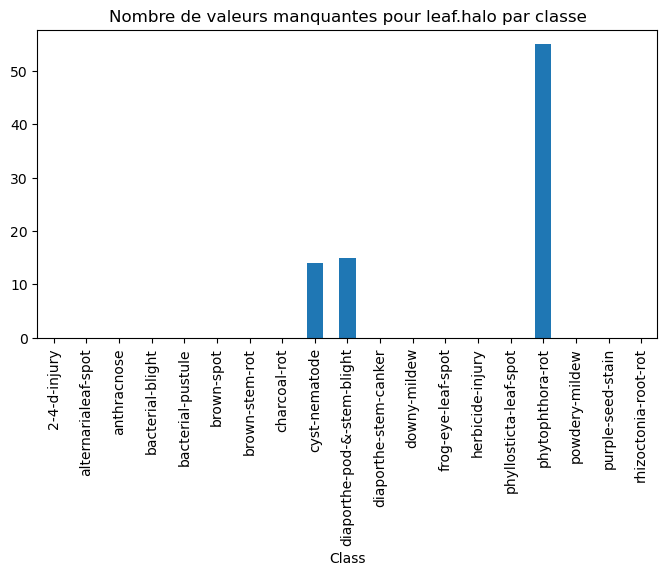

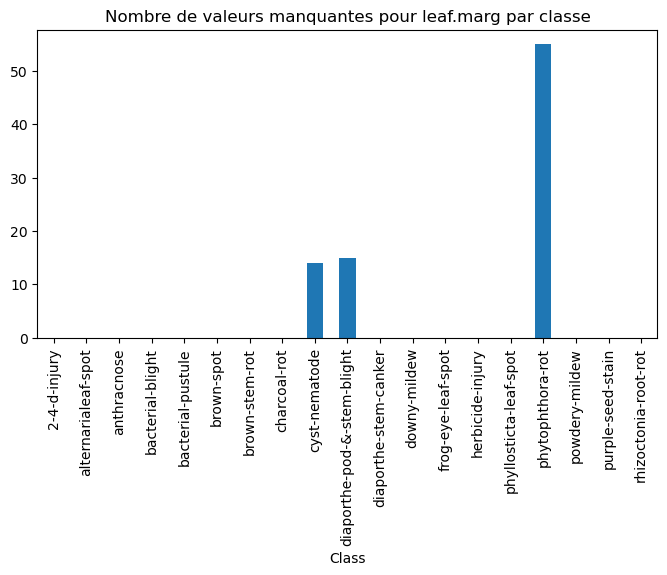

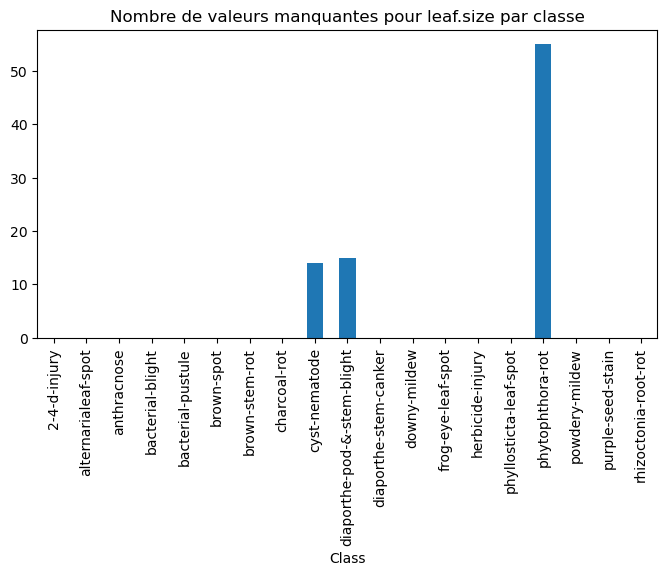

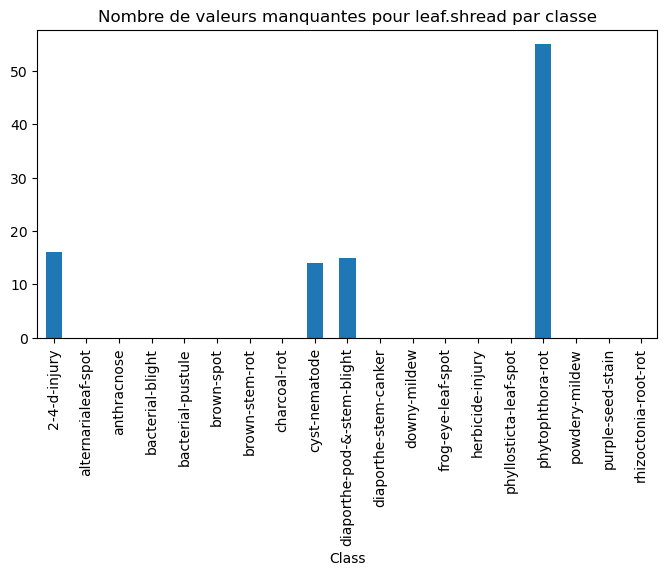

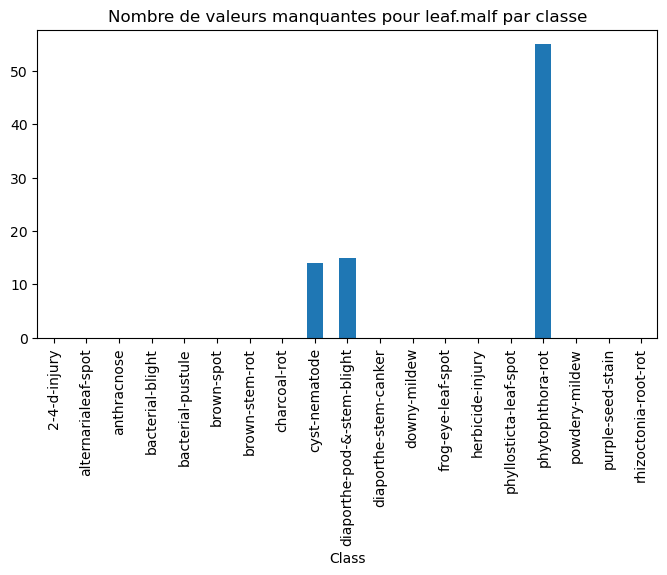

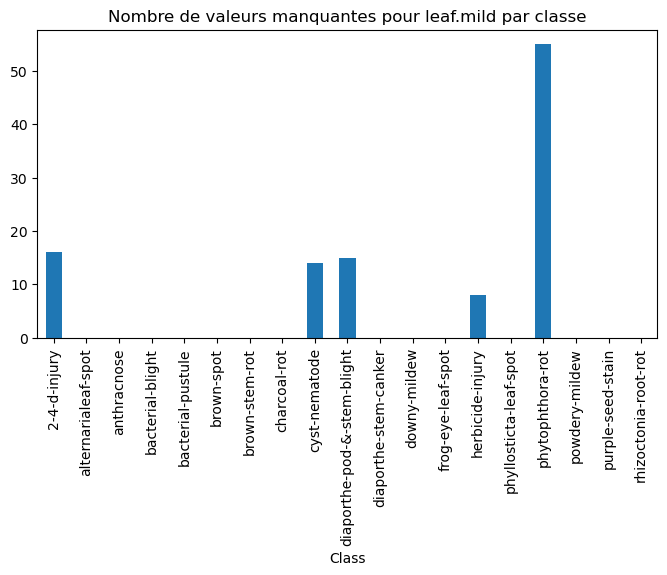

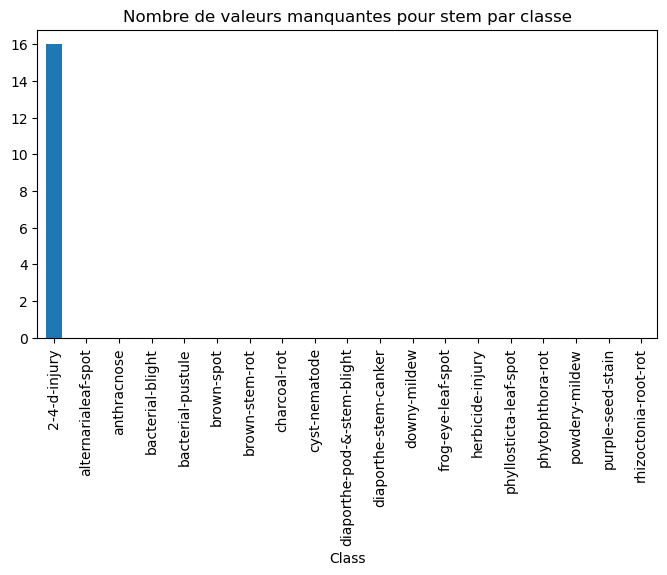

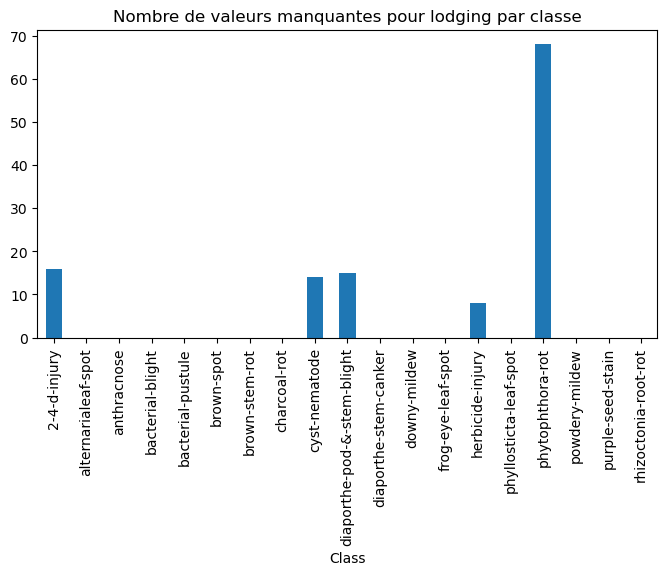

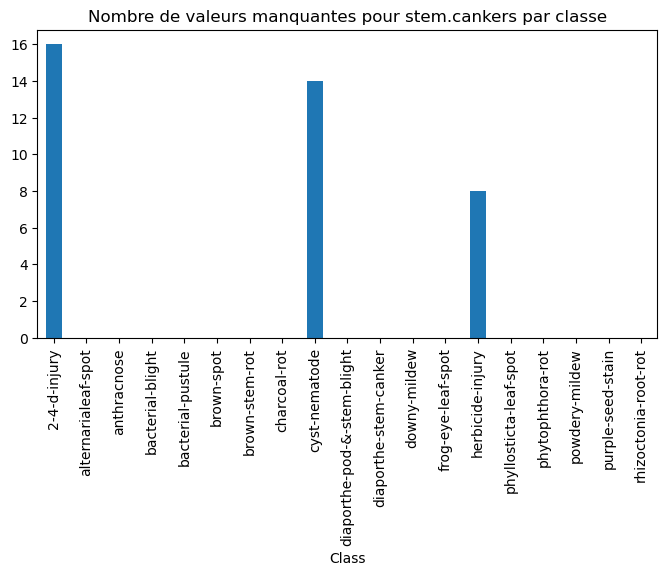

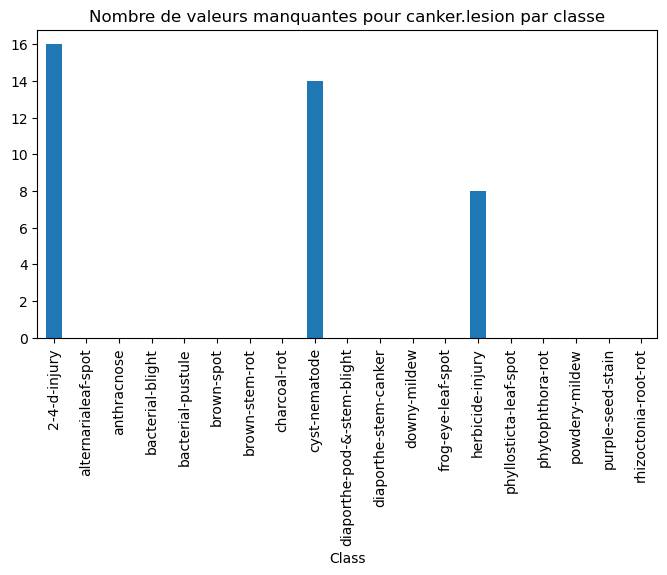

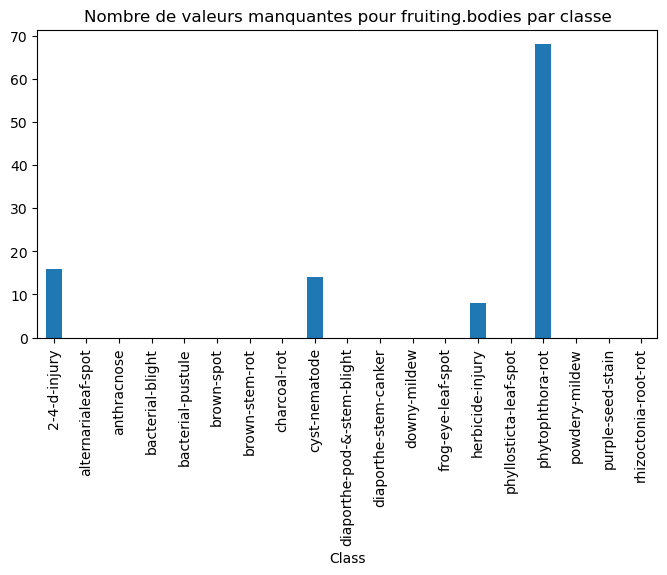

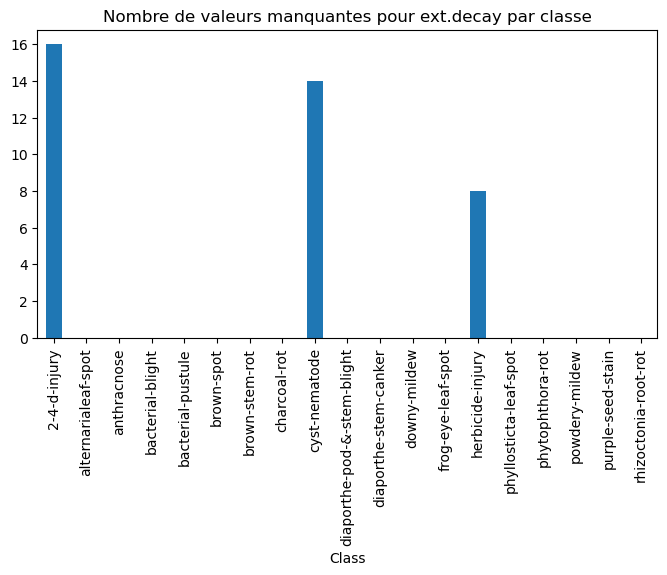

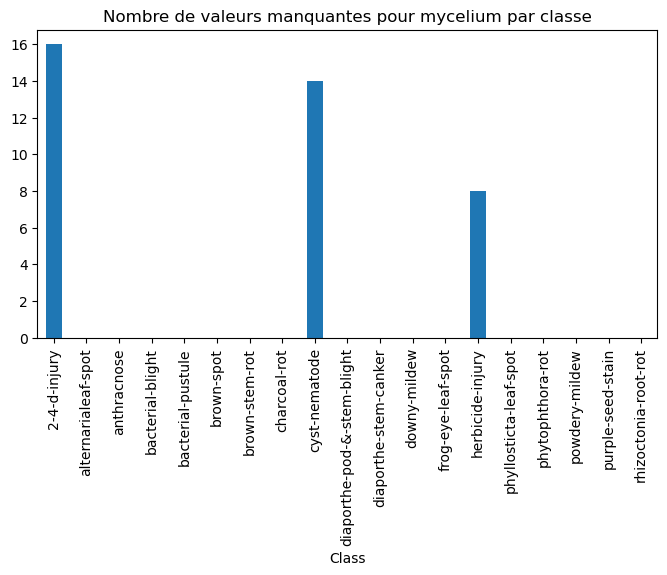

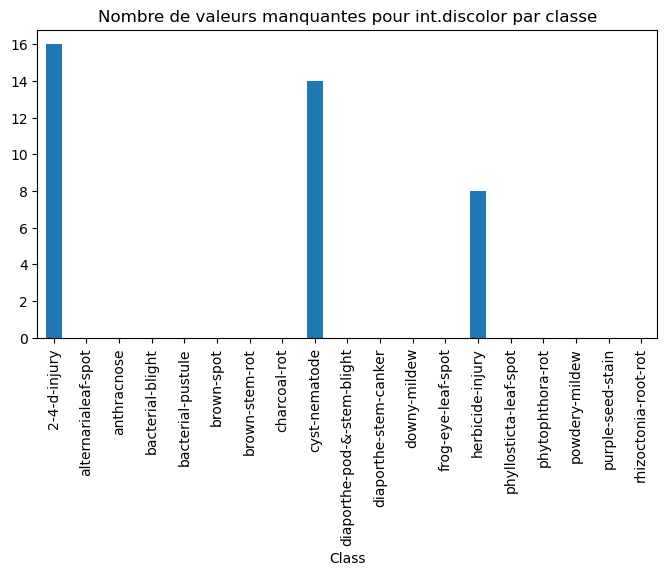

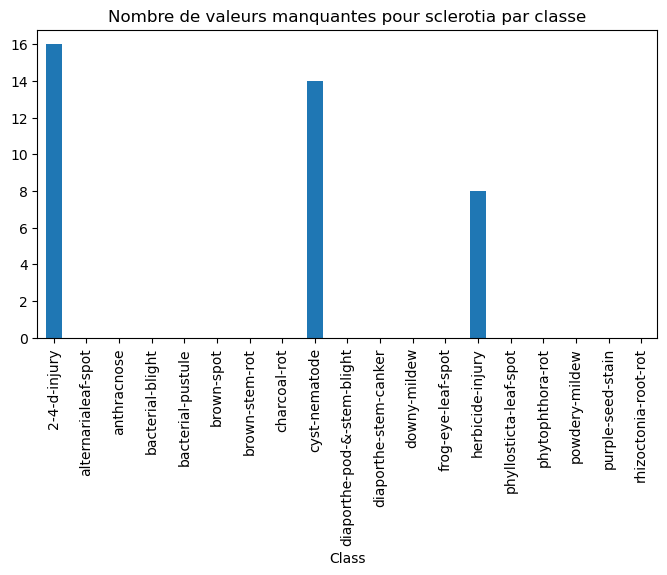

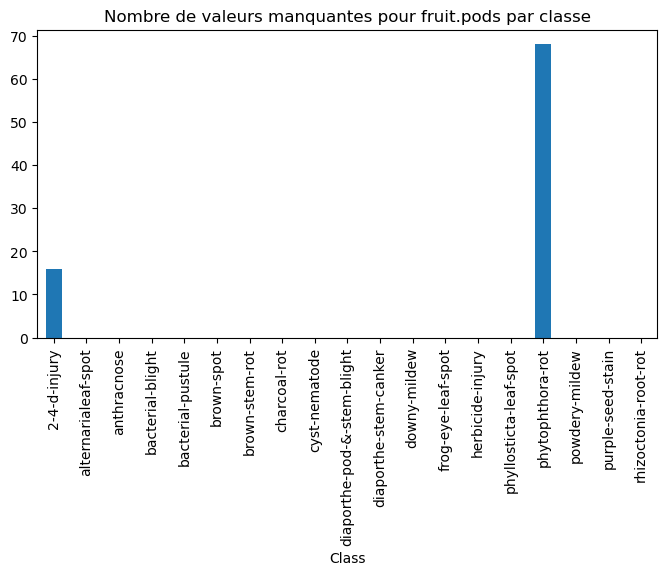

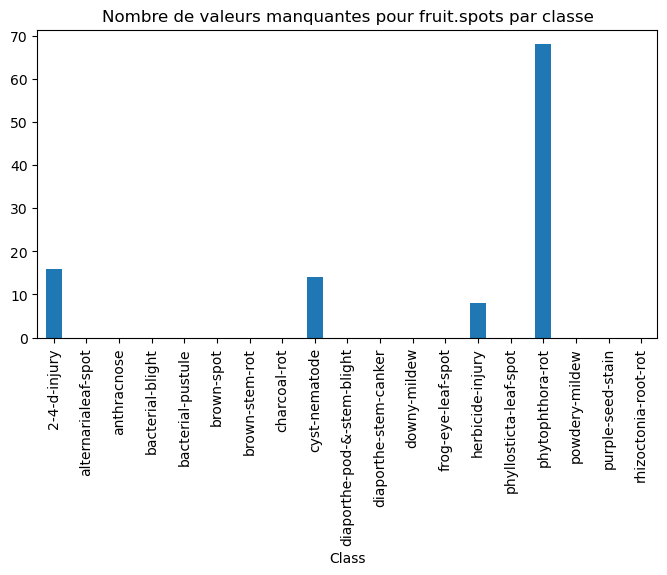

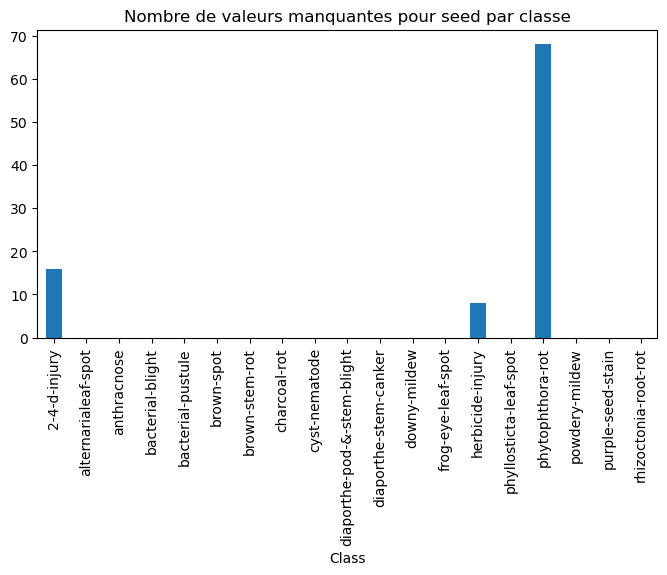

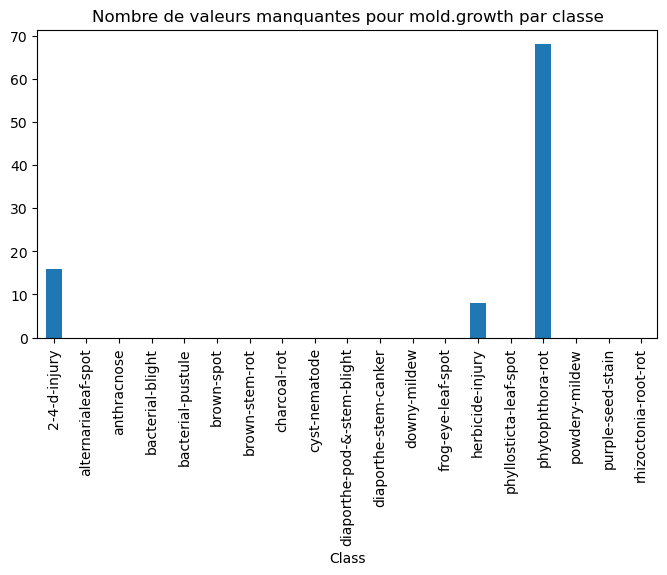

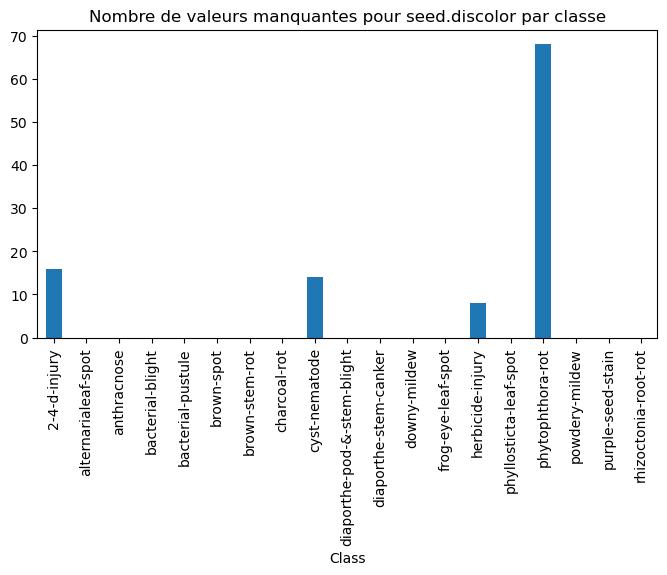

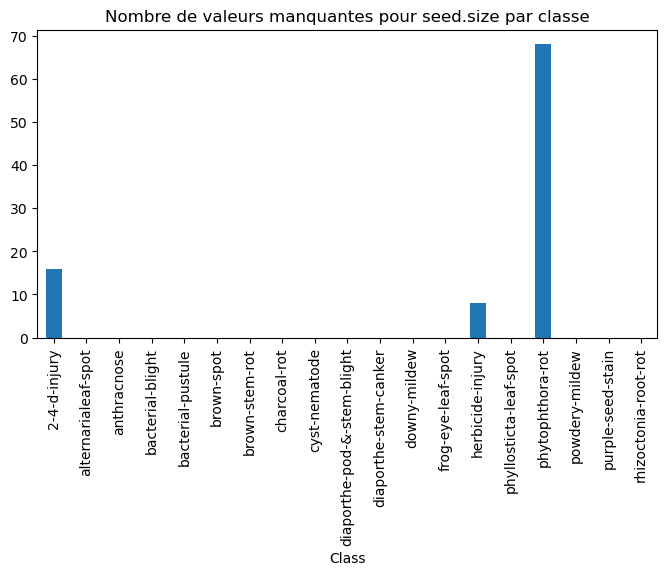

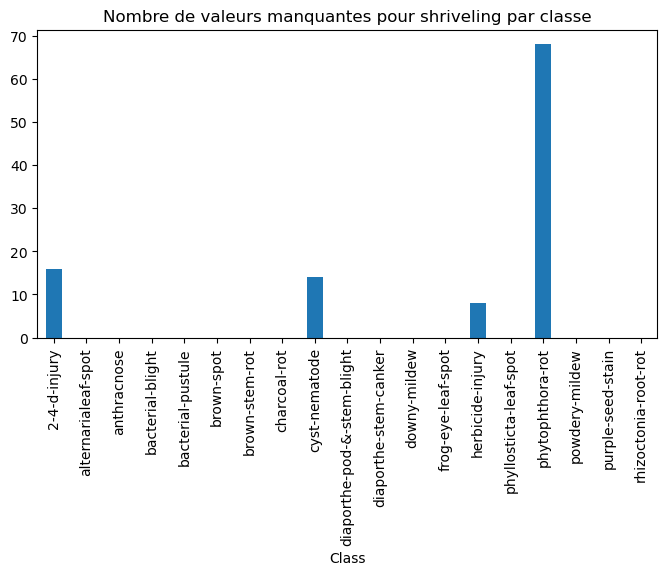

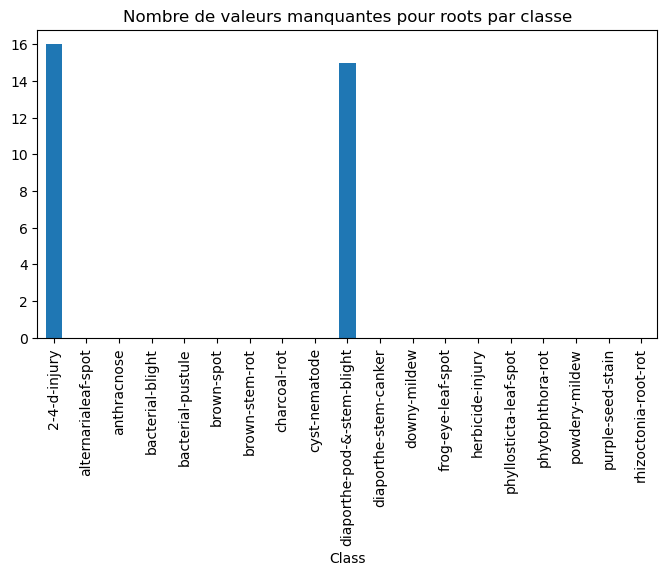

In [30]:
# Relation entre les données manquantes et les classes
for col in missing_cols:
    plt.figure(figsize=(8, 4))
    data.groupby('Class')[col].apply(lambda x: x.isnull().sum()).plot(kind='bar')
    plt.title(f"Nombre de valeurs manquantes pour {col} par classe")
    plt.show()

In [31]:
# Imputation
for col in missing_cols:
    if data[col].dtype == 'object':  # Imputation catégorielle
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Imputation numérique
        data[col].fillna(data[col].median(), inplace=True)


In [32]:
# Convertir les variables catégorielles avec Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':  # Si la colonne est catégorielle
        data[column] = label_encoder.fit_transform(data[column])


# Utilisation d’algorithmes d’imputation avancés

In [33]:
# Imputation via des modèles comme KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data.iloc[:, :] = imputer.fit_transform(data)


In [34]:
data.head()

,Unnamed: 0,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,...,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,1,10,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,10,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,10,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data.isnull().sum()

Unnamed: 0         0
Class              0
date               0
plant.stand        0
precip             0
temp               0
hail               0
crop.hist          0
area.dam           0
sever              0
seed.tmt           0
germ               0
plant.growth       0
leaves             0
leaf.halo          0
leaf.marg          0
leaf.size          0
leaf.shread        0
leaf.malf          0
leaf.mild          0
stem               0
lodging            0
stem.cankers       0
canker.lesion      0
fruiting.bodies    0
ext.decay          0
mycelium           0
int.discolor       0
sclerotia          0
fruit.pods         0
fruit.spots        0
seed               0
mold.growth        0
seed.discolor      0
seed.size          0
shriveling         0
roots              0
dtype: int64